# 关键词和时间分布分析

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from jieba.analyse import textrank
import jieba
import os
import stopwordsiso as stopwords

# 获取英语停用词列表
stopwords_list = list(stopwords.stopwords("en"))


# 设置中文支持（如果有中文内容）
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
# 数据加载
data_path = "./new_tweets/black-myth_2024-08-20_2024-09-30.xlsx"
stopwords_path = r"D:\Research Codes\Crawl\socialnetwork\WeiboTopicRepostCrawl\hit_stopwords.txt"
output_dir = "./analysis_results/"
os.makedirs(output_dir, exist_ok=True)

data = pd.read_excel(data_path, sheet_name="Main Data")
comments_data = pd.read_excel(data_path, sheet_name="Comments")


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 选择需要分析的列
engagement_columns = ['likes', 'replies', 'retweets']

# 检查并清理缺失值
for column in engagement_columns:
    data[column].fillna(0, inplace=True)
    data[column] = data[column].astype(int)

# 检查列数据是否正常加载
print(data[engagement_columns].describe())


              likes      replies     retweets
count    852.000000   852.000000   852.000000
mean    1196.951878    26.522300   194.348592
std     5275.018589    92.711147   791.032932
min        0.000000     0.000000     0.000000
25%        4.000000     0.000000     0.000000
50%      221.000000     2.000000    16.500000
75%      669.250000    14.000000   106.500000
max    93000.000000  1500.000000  9700.000000


C:\Users\23779\AppData\Local\Temp\ipykernel_26372\3304823416.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(0, inplace=True)
C:\Users\23779\AppData\Local\Temp\ipykernel_26372\3304823416.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [31]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']   

C:\Users\23779\AppData\Local\Temp\ipykernel_26372\2626427209.py:11: UserWarning: Glyph 20114 (\N{CJK UNIFIED IDEOGRAPH-4E92}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\23779\AppData\Local\Temp\ipykernel_26372\2626427209.py:11: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\23779\AppData\Local\Temp\ipykernel_26372\2626427209.py:11: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\23779\AppData\Local\Temp\ipykernel_26372\2626427209.py:11: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\23779\AppData\Local\Temp\ipykernel_26372\2626427209.py:11: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\23779\AppData\Local\Temp\ipykernel_26372\2626427209.py:11: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF})

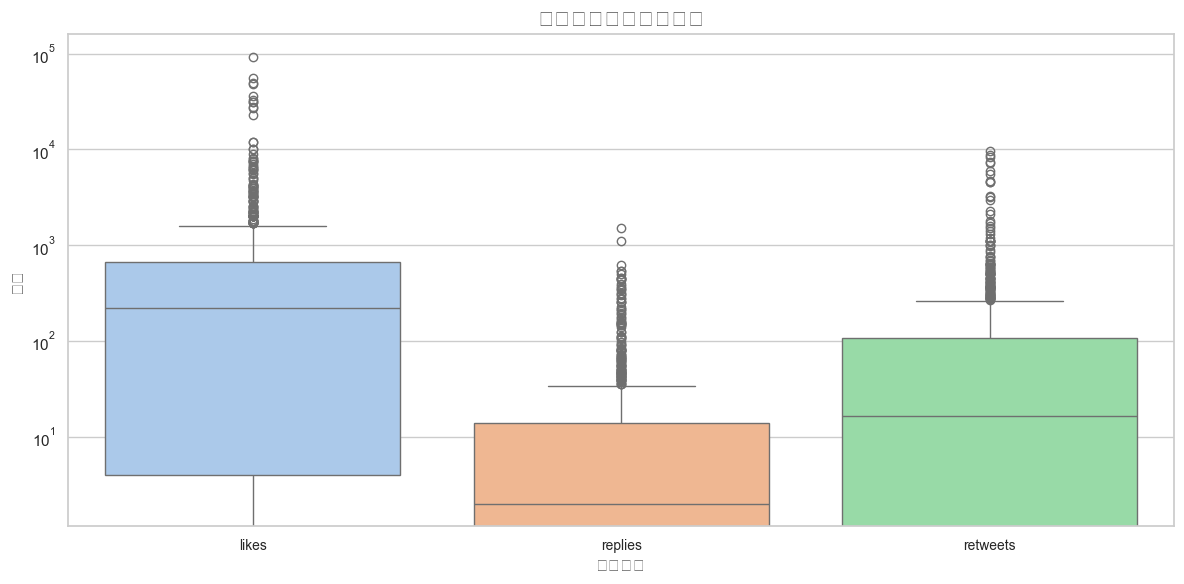

In [32]:
# 设置图形样式
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[engagement_columns], palette="pastel")
plt.title("转评赞数量分布箱线图", fontsize=16, fontweight="bold")
plt.xlabel("互动类型", fontsize=12)
plt.ylabel("数量", fontsize=12)
plt.yscale('log')  # 使用对数坐标以便处理大范围分布
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\23779\AppData\Local\Temp\ipykernel_26372\2788609163.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_stats.index, y=engagement_stats.values, palette="Blues_d", ax=ax[0])
C:\Users\23779\AppData\Local\Temp\ipykernel_26372\2788609163.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_engagement.index, y=avg_engagement.values, palette="Oranges_d", ax=ax[1])


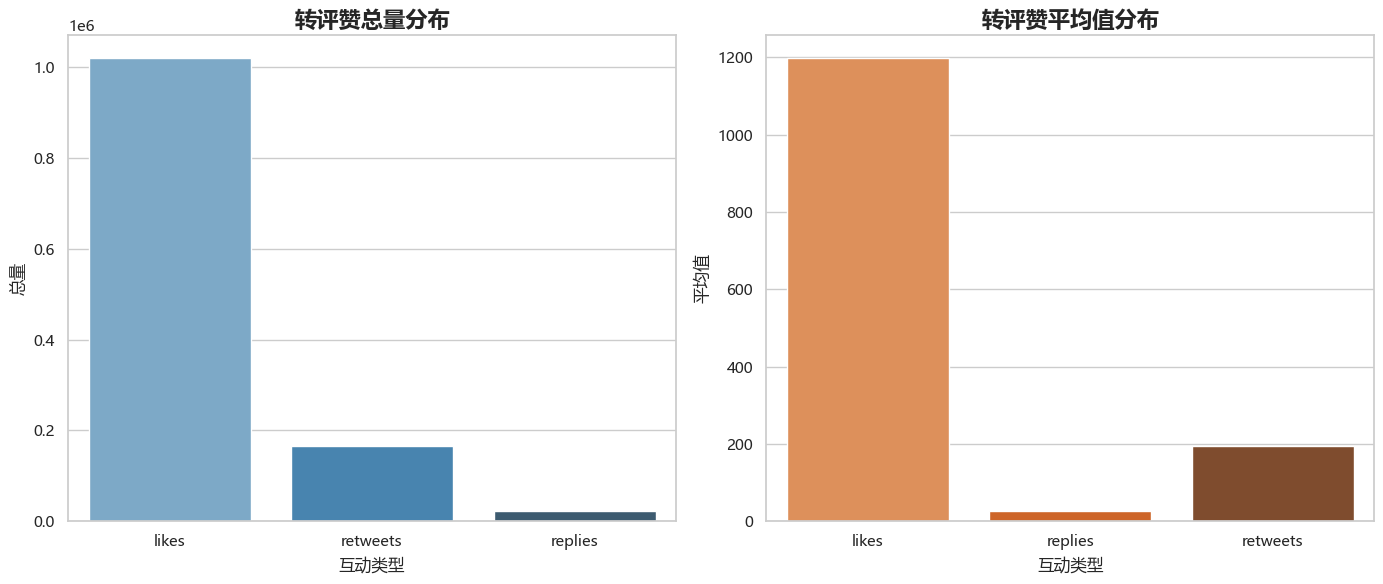

In [33]:
# 计算总数和平均数
engagement_stats = data[engagement_columns].sum().sort_values(ascending=False)
avg_engagement = data[engagement_columns].mean()
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 绘制柱状图
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 总量柱状图
sns.barplot(x=engagement_stats.index, y=engagement_stats.values, palette="Blues_d", ax=ax[0])
ax[0].set_title("转评赞总量分布", fontsize=16, fontweight="bold")
ax[0].set_xlabel("互动类型", fontsize=12)
ax[0].set_ylabel("总量", fontsize=12)

# 平均值柱状图
sns.barplot(x=avg_engagement.index, y=avg_engagement.values, palette="Oranges_d", ax=ax[1])
ax[1].set_title("转评赞平均值分布", fontsize=16, fontweight="bold")
ax[1].set_xlabel("互动类型", fontsize=12)
ax[1].set_ylabel("平均值", fontsize=12)

plt.tight_layout()
plt.show()


In [20]:
data.columns

Index(['content', 'likes', 'replies', 'retweets', 'reads', 'publish_time',
       'url', 'author', 'user_id', 'user_name', 'display_name', 'user_url',
       'profile_picture', 'header_photo', 'bio', 'location', 'website_link',
       'birthday', 'followers_count', 'following_count', 'tweets_count',
       'likes_count', 'media_count', 'listed_count', 'join_date', 'auth',
       'professional', 'protected'],
      dtype='object')

In [9]:
comments_data.columns

Index(['content', 'author', '_id', 'pub_time', 'source_url', 'pictures',
       'video_url', 'play_duration', 'up_count', 'cmt_count', 'read_count',
       'rtt_count', 'share_count', 'collect_count', 'quote_count',
       'play_count', 'is_retweet', 'is_quote', 'embed_url', 'language',
       'ref_article_id', 'ref_source_url', 'root_article_id',
       'root_source_url', 'author_info.user_name', 'author_info.user_url',
       'retweet_info._id', 'retweet_info.retweet_author.user_id',
       'retweet_info.retweet_author.user_name', 'retweet_info.url',
       'quote_info._id', 'quote_info.quote_author.user_id',
       'quote_info.quote_author.user_name', 'quote_info.url',
       'ref_author_info.user_id', 'ref_author_info.user_name',
       'ref_author_info.user_url', 'root_author_info.user_id',
       'root_author_info.user_name', 'root_author_info.user_url',
       'source_tweet_id', 'source_tweet_text', 'user_id', 'user_name',
       'display_name', 'user_url', 'profile_picture', 'h

In [17]:
def extract_keywords_tfidf(data, column, stopwords_list, top_n=10):
    """
    使用 TF-IDF 提取关键词。
    :param data: DataFrame
    :param column: 文本所在列名
    :param stopwords_list: 停用词列表
    :param top_n: 提取关键词数量
    :return: 关键词列表
    """
    # 数据清理
    # texts = data[column].dropna().astype(str).tolist()
    texts = data
    # TF-IDF 向量化
    vectorizer = TfidfVectorizer(stop_words=stopwords_list, max_features=top_n)
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    keywords = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    
    print(f"TF-IDF Keywords: {keywords}")
    return keywords

def remove_at_sign(df):
    df['content'] = df['content'].str.replace(r'^@.*?\s', '', regex=True)
    return df

data = remove_at_sign(data)
comments_data = remove_at_sign(comments_data)

# data和comment的text合并
content_list = data["content"].dropna().astype(str).tolist() + comments_data["content"].dropna().astype(str).tolist()
# 1. TF-IDF 提取关键词
tfidf_keywords = extract_keywords_tfidf(content_list, column="text", stopwords_list=stopwords_list, top_n=200)
tfidf_keywords

TF-IDF Keywords: [('liziqi', np.float64(91.31794912638183)), ('https', np.float64(28.389347122095625)), ('video', np.float64(17.58405759025805)), ('omg', np.float64(16.211152031882392)), ('dia', np.float64(14.872912576433633)), ('youtube', np.float64(14.3502215485939)), ('comeback', np.float64(13.04344967409809)), ('ya', np.float64(12.764841673959275)), ('cnliziqi', np.float64(12.38476376311344)), ('di', np.float64(12.131482325448841)), ('akhirnya', np.float64(12.046640627301684)), ('finally', np.float64(11.860010173129114)), ('udah', np.float64(11.832438885809292)), ('videos', np.float64(11.751029989694658)), ('lagi', np.float64(10.656151036121269)), ('tahun', np.float64(10.629901067144997)), ('lama', np.float64(10.242770434064502)), ('happy', np.float64(10.20038104019365)), ('来玩玩看', np.float64(9.968680398551824)), ('aku', np.float64(9.869391099942423)), ('chinese', np.float64(9.753259962858543)), ('china', np.float64(9.751609194119311)), ('mampir', np.float64(9.645814396307365)), ('z

d:\SoftwareLocation\Anaconda\envs\crawl\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'daren', 'hadn', 'herse', 'himse', 'itse', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan'] not in stop_words.
  warnings.warn(


[('liziqi', np.float64(91.31794912638183)),
 ('https', np.float64(28.389347122095625)),
 ('video', np.float64(17.58405759025805)),
 ('omg', np.float64(16.211152031882392)),
 ('dia', np.float64(14.872912576433633)),
 ('youtube', np.float64(14.3502215485939)),
 ('comeback', np.float64(13.04344967409809)),
 ('ya', np.float64(12.764841673959275)),
 ('cnliziqi', np.float64(12.38476376311344)),
 ('di', np.float64(12.131482325448841)),
 ('akhirnya', np.float64(12.046640627301684)),
 ('finally', np.float64(11.860010173129114)),
 ('udah', np.float64(11.832438885809292)),
 ('videos', np.float64(11.751029989694658)),
 ('lagi', np.float64(10.656151036121269)),
 ('tahun', np.float64(10.629901067144997)),
 ('lama', np.float64(10.242770434064502)),
 ('happy', np.float64(10.20038104019365)),
 ('来玩玩看', np.float64(9.968680398551824)),
 ('aku', np.float64(9.869391099942423)),
 ('chinese', np.float64(9.753259962858543)),
 ('china', np.float64(9.751609194119311)),
 ('mampir', np.float64(9.645814396307365))

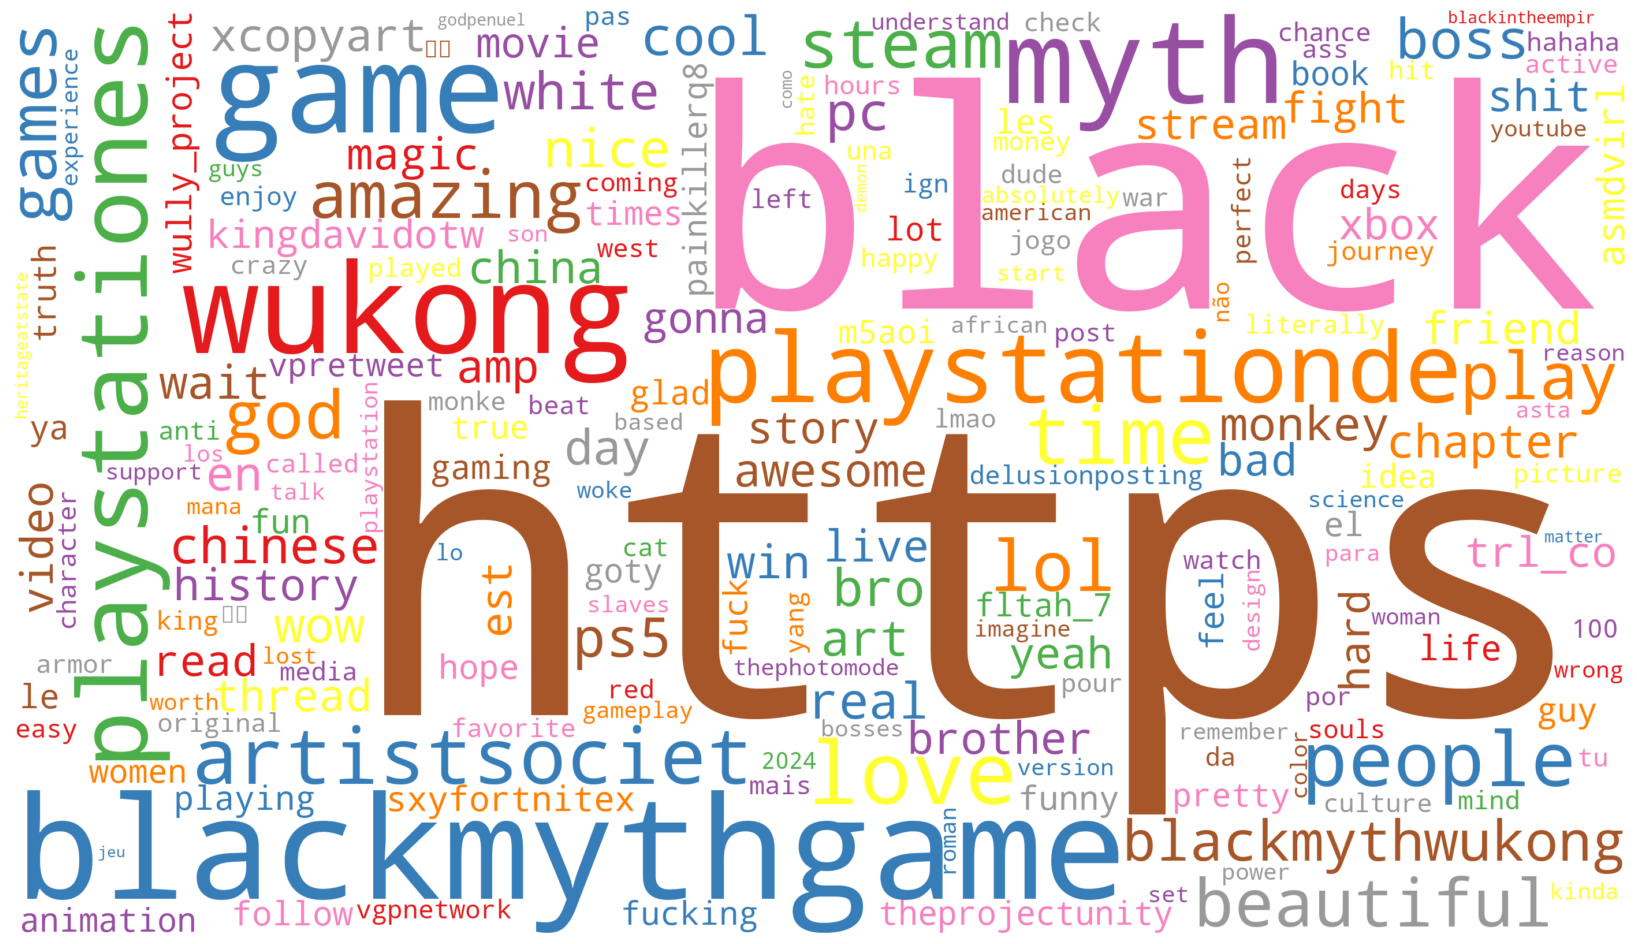

In [3]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# 创建词云图
def generate_wordcloud_with_background(keywords, output_path=None):
    """
    生成带背景的词云图。
    :param keywords: 关键词及权重的字典
    :param mask_image: 背景图片数组
    :param output_path: 保存路径，为 None 则直接显示
    """
    wordcloud = WordCloud(
        width=2800,
        height=1600,
        background_color="white",
        contour_width=1,  # 外轮廓宽度
        contour_color="black",  # 外轮廓颜色
        colormap="Set1",  # 颜色图谱
    ).generate_from_frequencies(keywords)

    plt.figure(figsize=(21, 12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight")
    else:
        plt.show()



# 生成词云图
generate_wordcloud_with_background(dict(tfidf_keywords), output_path="./analysis_results/black_wordcloud.jpg")


In [3]:
import spacy
import pytextrank

def extract_keywords_textrank_en(data, column, top_n=10):
    """
    使用 PyTextRank 提取英文关键词。
    :param data: DataFrame
    :param column: 文本所在列名
    :param top_n: 提取关键词数量
    :return: 关键词列表
    """
    nlp = spacy.load("en_core_web_sm")
    nlp.add_pipe("textrank")

    # 合并文本
    texts = data[column].dropna().astype(str).tolist()
    combined_text = " ".join(texts)

    # 分析文本
    doc = nlp(combined_text)

    # 提取关键词
    keywords = [(phrase.text, phrase.rank) for phrase in doc._.phrases[:top_n]]
    print(f"TextRank Keywords: {keywords}")
    return keywords

# 示例调用
textrank_keywords = extract_keywords_textrank_en(data, column="text", top_n=20)
textrank_keywords

d:\SoftwareLocation\Anaconda\envs\crawl\Lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


d:\SoftwareLocation\Anaconda\envs\crawl\Lib\site-packages
TextRank Keywords: [('Black Myth Wukong Black Myth', 0.10975274322505092), ('Black Myth Wukong now.#AtlasonDeck Black Myth', 0.10860052135226281), ('Wukong Black Myth Wukong', 0.10680770067375629), ('Black Myth Wukong', 0.10233264599004285), ('Wukong Black Myth', 0.10233264599004285), ('de Black Myth Wukong', 0.09658152423931864), ('more Black Myth Wukong', 0.09543250069254673), ('sur Black Myth Wukong', 0.0949819256214684), ('Black Myth Wukong Sony', 0.0948250102840304), ('Black Myth Wukong INSANE', 0.09482474639667407), ('El Black Myth Wukong', 0.09478172425665635), ('More Black Myth Wukong', 0.09476001003729739), ('Black Myth Wukong Playthrough', 0.09475945720739086), ('Black Myth', 0.09475317315905137), ('Black Myth Wukong Chapter', 0.09474551616220882), ('Black Myth Wukong Video', 0.09473507291023797), ('Kratos Black Myth Wukong', 0.09463845598655991), ('Wukong، Black Myth', 0.09459831807817064), ('Kalıntıları Black Myth Wu

[('Black Myth Wukong Black Myth', 0.10975274322505092),
 ('Black Myth Wukong now.#AtlasonDeck Black Myth', 0.10860052135226281),
 ('Wukong Black Myth Wukong', 0.10680770067375629),
 ('Black Myth Wukong', 0.10233264599004285),
 ('Wukong Black Myth', 0.10233264599004285),
 ('de Black Myth Wukong', 0.09658152423931864),
 ('more Black Myth Wukong', 0.09543250069254673),
 ('sur Black Myth Wukong', 0.0949819256214684),
 ('Black Myth Wukong Sony', 0.0948250102840304),
 ('Black Myth Wukong INSANE', 0.09482474639667407),
 ('El Black Myth Wukong', 0.09478172425665635),
 ('More Black Myth Wukong', 0.09476001003729739),
 ('Black Myth Wukong Playthrough', 0.09475945720739086),
 ('Black Myth', 0.09475317315905137),
 ('Black Myth Wukong Chapter', 0.09474551616220882),
 ('Black Myth Wukong Video', 0.09473507291023797),
 ('Kratos Black Myth Wukong', 0.09463845598655991),
 ('Wukong، Black Myth', 0.09459831807817064),
 ('Kalıntıları Black Myth Wukong', 0.09458670314176071),
 ('Terminando Black Myth Wukon

In [4]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

def extract_topics_lda(data, column, stopwords_list, num_topics=5, num_words=10):
    """
    使用 LDA 提取主题。
    :param data: DataFrame
    :param column: 文本所在列名
    :param stopwords_list: 停用词列表
    :param num_topics: 主题数量
    :param num_words: 每个主题下的关键词数量
    :return: 主题和关键词列表
    """
    # 数据清理
    texts = data[column].dropna().astype(str).tolist()
    
    # 文本向量化
    vectorizer = CountVectorizer(stop_words=stopwords_list)
    dtm = vectorizer.fit_transform(texts)
    
    # LDA 模型训练
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(dtm)
    
    # 获取主题关键词
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        topic_keywords = [words[i] for i in topic.argsort()[:-num_words - 1:-1]]
        topics.append((f"Topic {topic_idx + 1}", topic_keywords))
    
    for topic, keywords in topics:
        print(f"{topic}: {', '.join(keywords)}")
    
    return topics


# LDA困惑度曲线
def plot_perplexity_curve(data, column, stopwords_list, max_topics=10):
    """
    绘制 LDA 困惑度曲线。
    :param data: DataFrame
    :param column: 文本所在列名
    :param stopwords_list: 停用词列表
    :param max_topics: 最大主题数量
    """
    # 数据清理
    texts = data[column].dropna().astype(str).tolist()
    
    # 文本向量化
    vectorizer = CountVectorizer(stop_words=stopwords_list)
    dtm = vectorizer.fit_transform(texts)
    
    # 计算困惑度
    perplexity_values = []
    for num_topics in range(1, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        lda.fit(dtm)
        perplexity_values.append(lda.perplexity(dtm))
    
    # 绘制困惑度曲线
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_topics + 1), perplexity_values, marker="o")
    plt.title("LDA Perplexity Curve")
    plt.xlabel("Number of Topics")
    plt.ylabel("Perplexity")
    plt.grid(True)
    plt.show()




# 示例调用
# plot_perplexity_curve(comments_data, column="content", stopwords_list=stopwords_list, max_topics=40)

# 3. LDA 提取主题
lda_topics = extract_topics_lda(comments_data, column="content", stopwords_list=stopwords_list, num_topics=1, num_words=10)

lda_topics


d:\SoftwareLocation\Anaconda\envs\crawl\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'daren', 'hadn', 'herse', 'himse', 'itse', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan'] not in stop_words.
  warnings.warn(


Topic 1: https, blackmythgame, game, black, playstationde, playstationes, love, artistsociet, people, wukong


[('Topic 1',
  ['https',
   'blackmythgame',
   'game',
   'black',
   'playstationde',
   'playstationes',
   'love',
   'artistsociet',
   'people',
   'wukong'])]

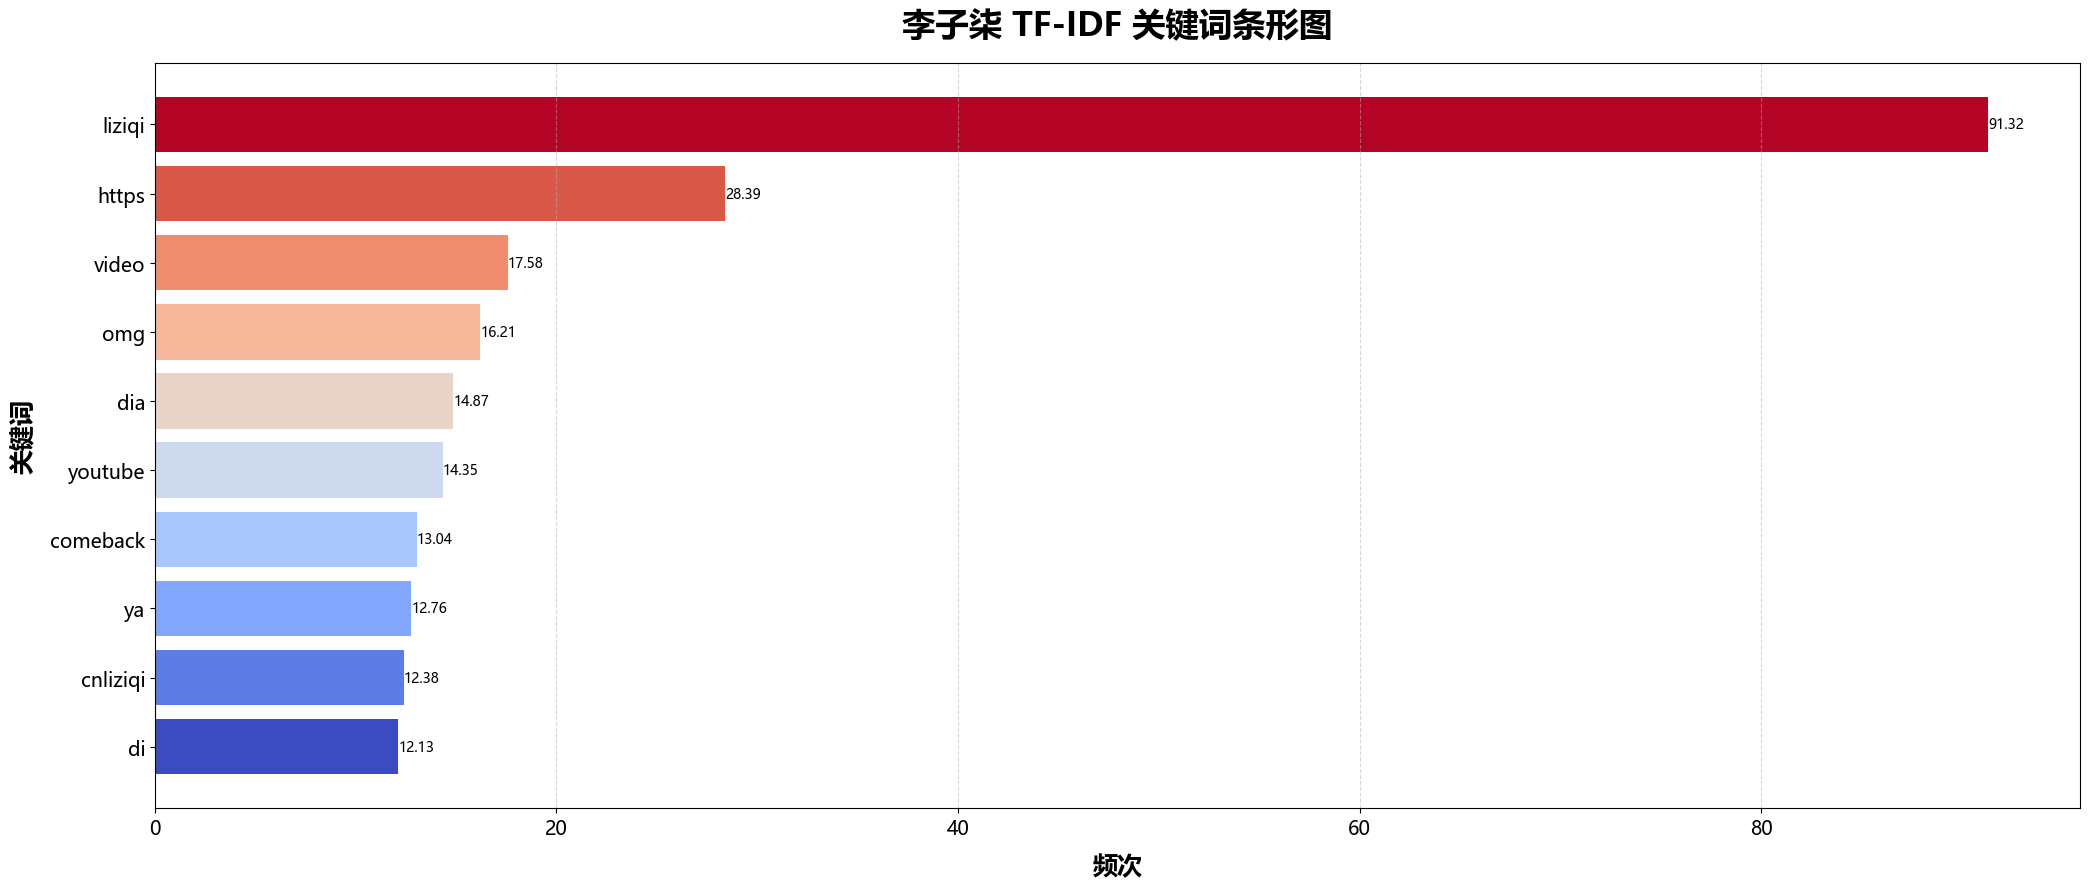

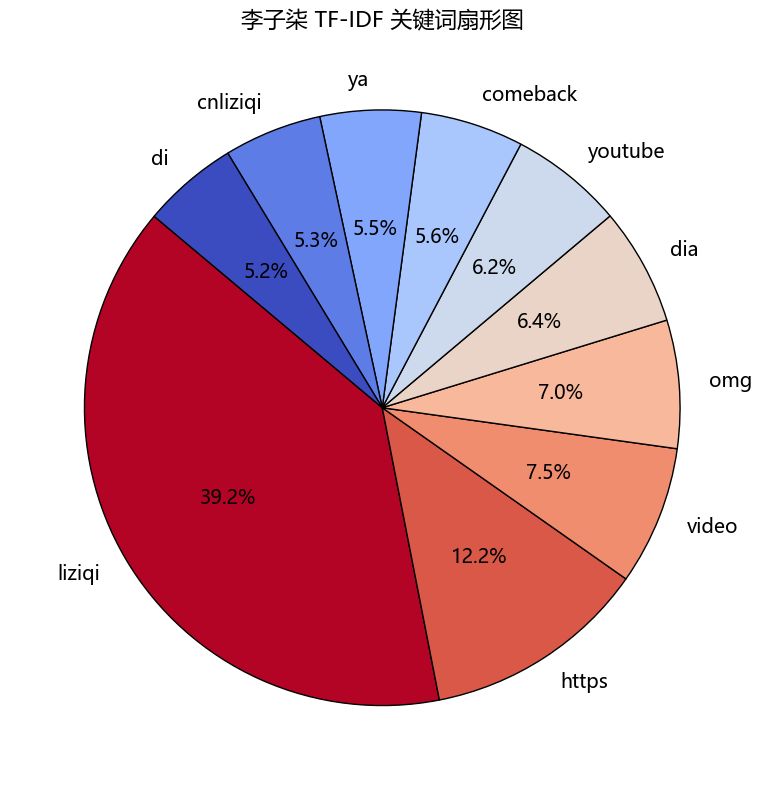

In [18]:
import matplotlib.pyplot as plt

def plot_tfidf_keywords(tfidf_keywords, output_dir="./analysis_results/"):
    """
    对 TF-IDF 关键词结果进行统计图表展示：条形图和扇形图。
    :param tfidf_keywords: 关键词及其权重字典
    :param output_dir: 保存图表的路径
    """
    # 确保输出目录存在
    os.makedirs(output_dir, exist_ok=True)

    # 转换为列表并按权重排序
    sorted_keywords = sorted(tfidf_keywords.items(), key=lambda x: x[1], reverse=True)[:10]  # 取前10个关键词
    words, weights = zip(*sorted_keywords)

    # --- 条形图 ---
    plt.figure(figsize=(21, 9))
    bars = plt.barh(words, weights, color=plt.cm.coolwarm(np.linspace(1,0, len(words))))

    plt.xlabel("频次", fontsize=18, fontweight="bold", labelpad=10)
    plt.ylabel("关键词", fontsize=18, fontweight="bold", labelpad=10)
    plt.title("李子柒 TF-IDF 关键词条形图", fontsize=24, fontweight="bold",pad=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.gca().invert_yaxis()  # 翻转 Y 轴让权重最高的排在最上方
    plt.grid(axis="x", linestyle="--", alpha=0.5)

    # 添加数值标签
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{bar.get_width():.2f}", va="center", ha="left", fontsize=10)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "liziqi_tfidf_bar_chart.png"), dpi=300, bbox_inches="tight", pad_inches=0.5)
    plt.show()

    # --- 扇形图 ---
    plt.figure(figsize=(10, 8))
    plt.pie(
        weights,
        labels=words,
        autopct=lambda p: f"{p:.1f}%" if p > 2 else "",
        startangle=140,
        colors=plt.cm.coolwarm(np.linspace(1, 0, len(words))),
        wedgeprops={"edgecolor": "black", "linewidth": 1},
        textprops={"fontsize": 14},
    )
    plt.title("李子柒 TF-IDF 关键词扇形图", fontsize=16)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "liziqi_tfidf_pie_chart.png"), dpi=300, bbox_inches="tight", pad_inches=0.5)
    plt.show()


# 使用示例
plot_tfidf_keywords(dict(tfidf_keywords), output_dir="./analysis_results/")


d:\SoftwareLocation\Anaconda\envs\crawl\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


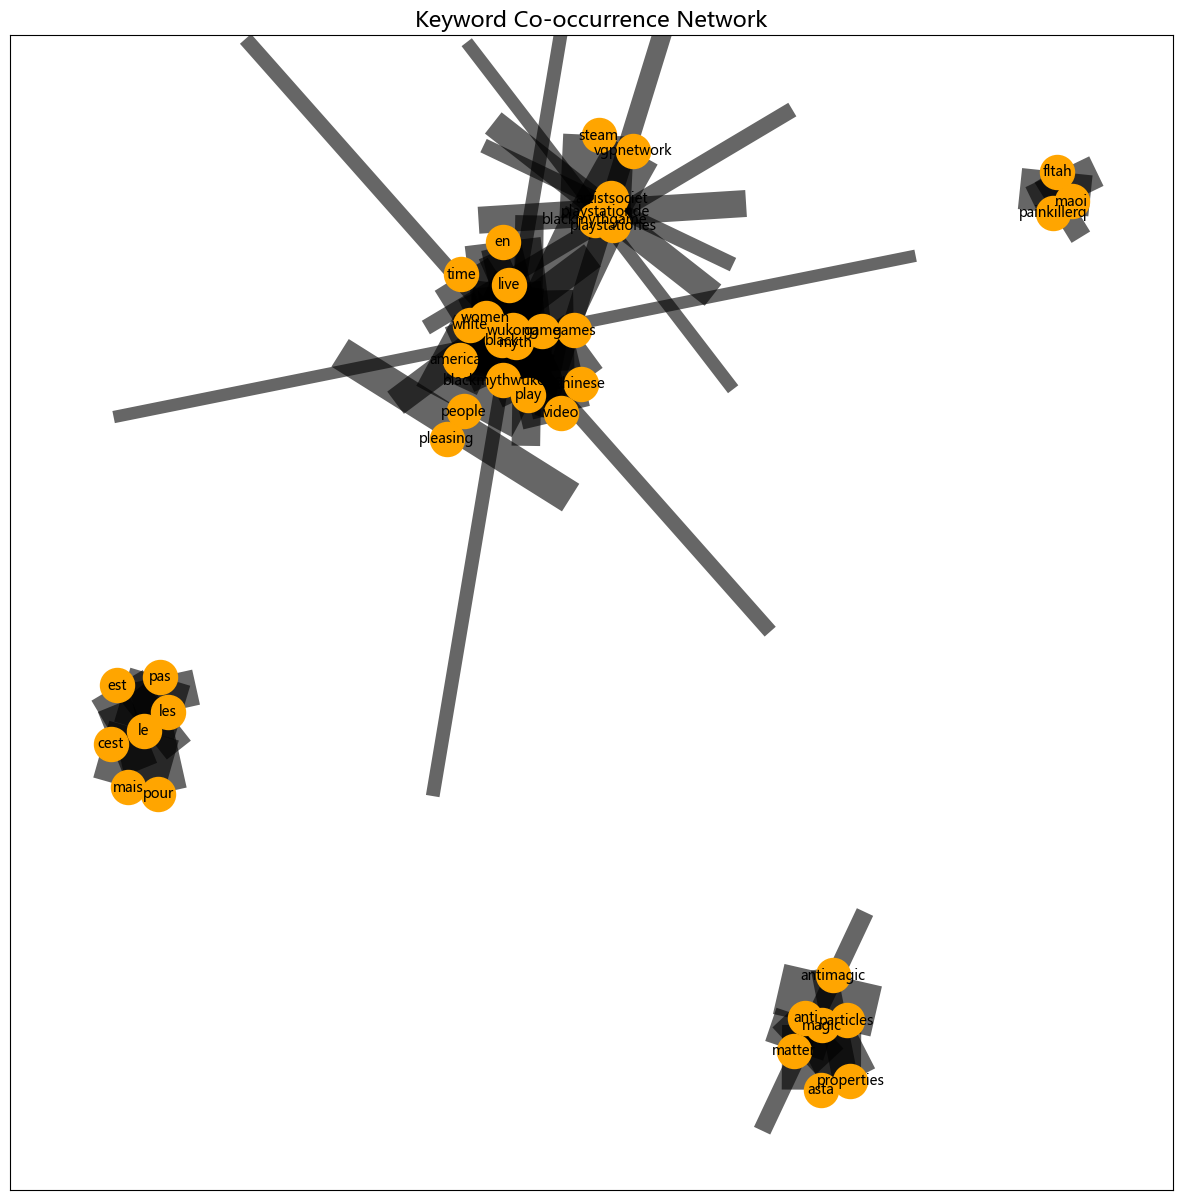

In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from itertools import combinations

# 停用词加载
from stopwordsiso import stopwords

# 合并数据中的文本内容
def combine_texts(data, comments_data, text_column="content", content_column="content"):
    """
    合并 data 和 comments_data 中的文本列。
    """
    texts = data[text_column].dropna().tolist()
    comments = comments_data[content_column].dropna().tolist()
    combined_texts = texts + comments
    return combined_texts

# 文本预处理
def preprocess_text(text, lang="en"):
    """
    文本清洗与分词。
    :param text: 输入文本
    :param lang: 停用词语言
    :return: 清洗后的分词列表
    """
    # 清除非字母字符
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    # 分词
    words = text.split()
    # 去除停用词
    filtered_words = [word for word in words if word not in stopwords_list]
    return filtered_words

# 构建关键词共现矩阵
def build_cooccurrence_matrix(texts, window_size=2):
    """
    构建关键词共现矩阵。
    :param texts: 文本列表
    :param window_size: 滑动窗口大小
    :return: 共现矩阵和词列表
    """
    vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
    word_matrix = vectorizer.fit_transform(texts)
    vocab = vectorizer.get_feature_names_out()
    cooccurrence_matrix = (word_matrix.T * word_matrix)
    cooccurrence_matrix.setdiag(0)  # 自相关置为 0
    return cooccurrence_matrix, vocab

# 可视化共现网络
def visualize_cooccurrence_network(cooccurrence_matrix, vocab, output_path, top_k=50):
    """
    绘制共现网络。
    :param cooccurrence_matrix: 共现矩阵
    :param vocab: 词汇表
    :param output_path: 网络图保存路径
    :param top_k: 选取权重最高的前 K 个边
    """
    G = nx.Graph()
    vocab = list(vocab)
    for i in range(len(vocab)):
        for j in range(i + 1, len(vocab)):
            weight = cooccurrence_matrix[i, j]
            if weight > 0:
                G.add_edge(vocab[i], vocab[j], weight=weight)

    # 提取权重前 top_k 的边
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:top_k]
    H = nx.Graph()
    H.add_edges_from(edges)

    # 绘制网络
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(H, seed=42)
    edge_weights = [H[u][v]['weight'] for u, v in H.edges()]
    # 保存为gephi格式
    nx.write_gexf(H, output_path.replace(".png", ".gexf"))
    nx.draw_networkx_nodes(H, pos, node_size=600, node_color="orange")
    nx.draw_networkx_edges(H, pos, width=edge_weights, alpha=0.6)
    nx.draw_networkx_labels(H, pos, font_size=10, font_color="black")
    plt.title("Keyword Co-occurrence Network", fontsize=16)
    # plt.savefig(output_path)
    
    plt.show()

# 主函数
def analyze_keyword_cooccurrence(data, comments_data, output_path, lang="en"):
    """
    构建并绘制关键词共现网络。
    :param data: 主数据 DataFrame
    :param comments_data: 评论数据 DataFrame
    :param output_path: 输出图片路径
    :param lang: 停用词语言
    """
    # 合并文本
    combined_texts = combine_texts(data, comments_data)
    # 文本预处理
    preprocessed_texts = [preprocess_text(text, lang) for text in combined_texts]
    # 构建共现矩阵
    cooccurrence_matrix, vocab = build_cooccurrence_matrix(preprocessed_texts)
    # 可视化共现网络
    visualize_cooccurrence_network(cooccurrence_matrix.toarray(), vocab, output_path)

# 使用示例
data_path = "./new_tweets/black-myth_2024-08-20_2024-09-30.xlsx"
output_path = "./analysis_results/black_cooccurrence_network.png"
data = pd.read_excel(data_path, sheet_name="Main Data")
comments_data = pd.read_excel(data_path, sheet_name="Comments")

data = remove_at_sign(data)
comments_data = remove_at_sign(comments_data)

analyze_keyword_cooccurrence(data, comments_data, output_path, lang="en")


In [ ]:


def generate_gexf(data, source_column, target_column, output_path):
    """
    构建传播网络并导出为 GEXF 文件。
    :param data: 数据 DataFrame
    :param source_column: 源列名
    :param target_column: 目标列名
    :param output_path: 输出 GEXF 文件路径
    """
    g = nx.DiGraph()
    for _, row in data.iterrows():
        g.add_edge(row[source_column], row[target_column])
    
    nx.write_gexf(g, output_path)
    print(f"GEXF 文件已保存至 {output_path}")

def extract_keywords_textrank(texts, top_k=20, stopwords_path=None):
    """
    使用 TextRank 提取关键词。
    :param texts: 文本列表
    :param top_k: 提取关键词数量
    :param stopwords_path: 停用词文件路径
    :return: 关键词列表
    """
    if stopwords_path and os.path.exists(stopwords_path):
        with open(stopwords_path, 'r', encoding='utf-8') as f:
            stopwords = set([line.strip() for line in f])
        jieba.analyse.set_stop_words(stopwords_path)
    else:
        stopwords = set()

    full_text = " ".join(texts)
    keywords = textrank(full_text, topK=top_k, withWeight=False)
    return [word for word in keywords if word not in stopwords]

def extract_keywords_tfidf(texts, top_k=20, stopwords_path=None):
    """
    使用 TF-IDF 提取关键词。
    :param texts: 文本列表
    :param top_k: 提取关键词数量
    :param stopwords_path: 停用词文件路径
    :return: 关键词列表
    """
    if stopwords_path and os.path.exists(stopwords_path):
        with open(stopwords_path, 'r', encoding='utf-8') as f:
            stopwords = set([line.strip() for line in f])
    else:
        stopwords = set()

    vectorizer = TfidfVectorizer(max_features=top_k, stop_words=stopwords)
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    return feature_names.tolist()

def generate_wordcloud(texts, stopwords_path, output_path):
    """
    生成词云图。
    :param texts: 文本列表
    :param stopwords_path: 停用词文件路径
    :param output_path: 输出图片路径
    """
    if stopwords_path and os.path.exists(stopwords_path):
        with open(stopwords_path, 'r', encoding='utf-8') as f:
            stopwords = set([line.strip() for line in f])
    else:
        stopwords = set()

    full_text = " ".join(texts)
    wordcloud = WordCloud(
        font_path="simhei.ttf",
        stopwords=stopwords,
        background_color="white",
        width=800,
        height=400
    ).generate(full_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()






# 传播网络建模
generate_gexf(comments_data, source_column="source_tweet_id", target_column="author", output_path=os.path.join(output_dir, "spread_network.gexf"))

# 关键词提取
texts = data["text"].dropna().tolist()
textrank_keywords = extract_keywords_textrank(texts, top_k=20, stopwords_path=stopwords_path)
print("TextRank 关键词：", textrank_keywords)

# tfidf_keywords = extract_keywords_tfidf(texts, top_k=20, stopwords_path=stopwords_path)
# print("TF-IDF 关键词：", tfidf_keywords)

# 词云图绘制
generate_wordcloud(texts, stopwords_path, output_path=os.path.join(output_dir, "wordcloud.png"))


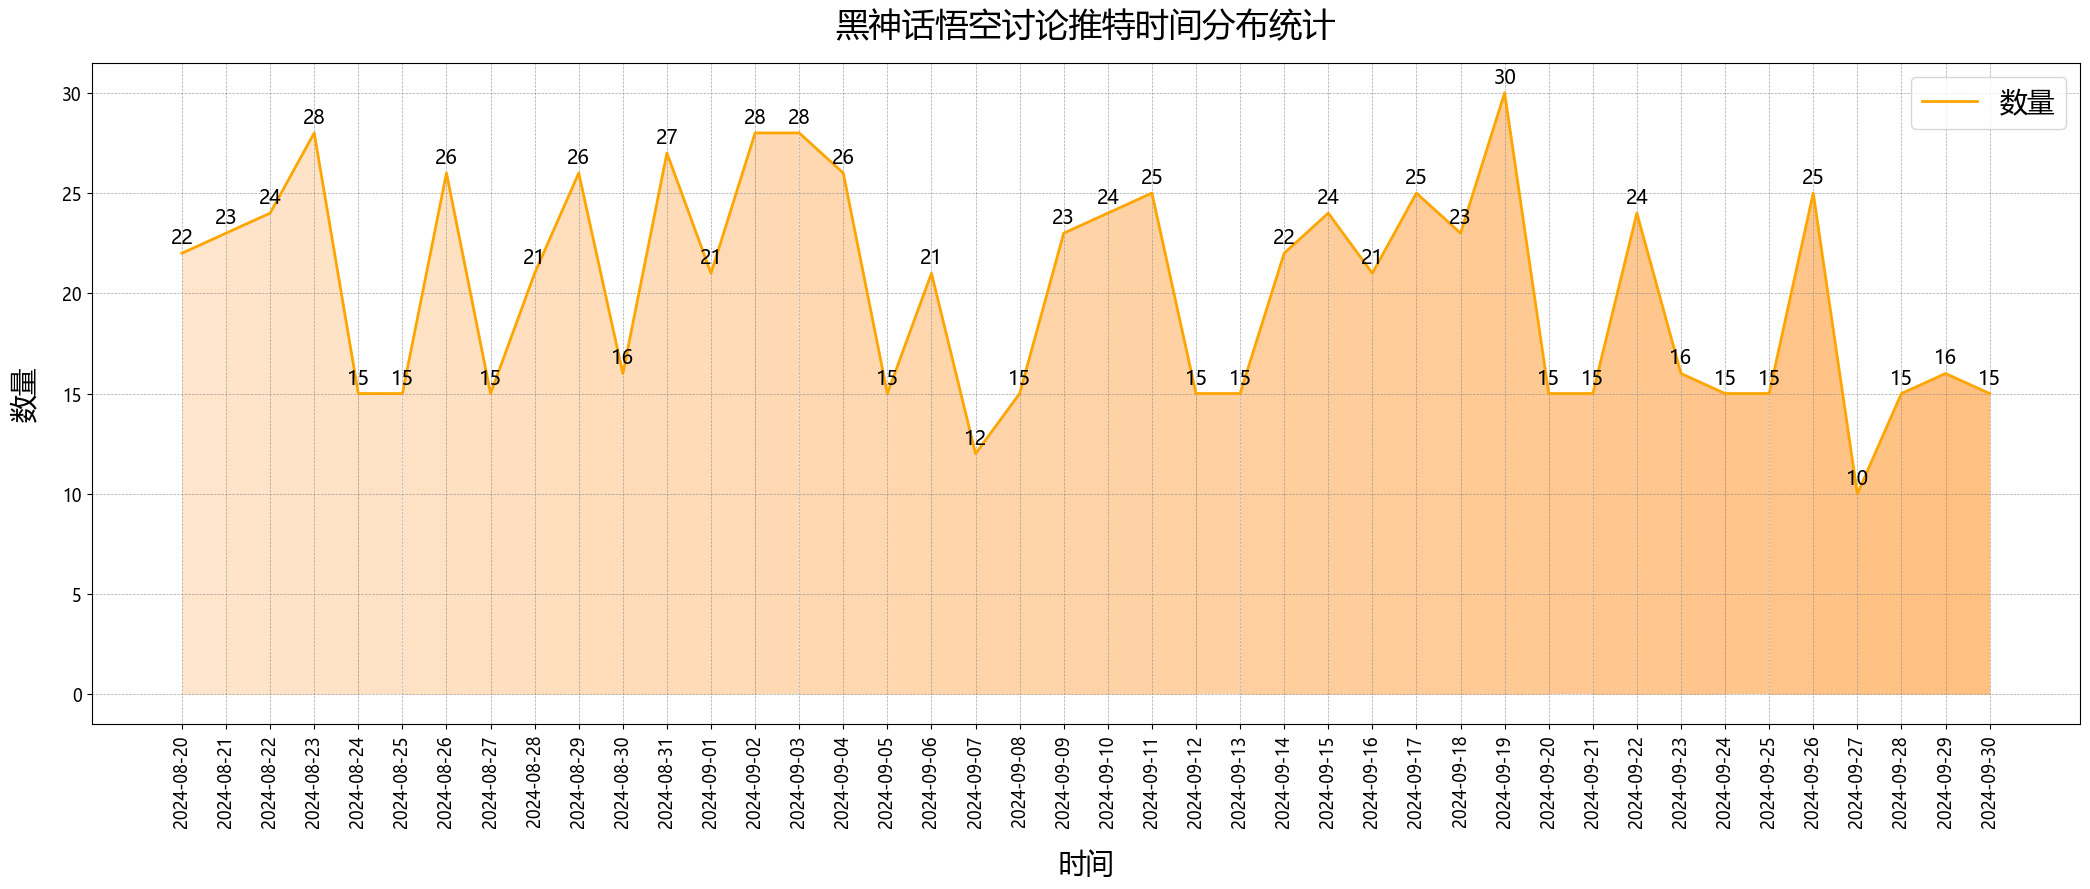

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import make_interp_spline

def plot_time_distribution(data, time_column, output_path):
    """
    绘制时间分布统计图。
    :param data: 数据 DataFrame
    :param time_column: 时间列名
    :param output_path: 输出图片路径
    """
    # 确保时间列为 datetime 格式
    data[time_column] = pd.to_datetime(data[time_column])
    time_series = data[time_column].value_counts().sort_index()

    # 插值平滑
    x = np.arange(len(time_series.index))
    y = time_series.values
    # x = np.linspace(x.min(), x.max(), 500)
    # spline = make_interp_spline(x, y)
    # y = spline(x)

    # 创建渐变色
    cmap = LinearSegmentedColormap.from_list("orange_fade", [(1, 0.5, 0, 0.2), (1, 0.5, 0, 0.5)])
    gradient_colors = cmap(np.linspace(0, 1, len(x)))

    # 绘制图形
    plt.figure(figsize=(21, 9))
    plt.plot(x, y, color='orange', label='数量', linewidth=2)

    # 填充渐变阴影
    for i in range(len(x) - 1):
        plt.fill_between(
            [x[i], x[i + 1]],
            [y[i], y[i + 1]],
            color=gradient_colors[i],
            linewidth=0,
        )

    # 添加数据标签
    for xi, yi in zip(x, y):
        plt.text(xi, yi + 0.5, str(yi), ha='center', fontsize=14)

    # 时间轴设置
    plt.xticks(ticks=x, labels=time_series.index.strftime('%Y-%m-%d'), rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('黑神话悟空讨论推特时间分布统计', fontsize=24, pad=20)
    plt.xlabel('时间', fontsize=20, labelpad=16)
    plt.ylabel('数量', fontsize=20, labelpad=16)
    plt.legend(fontsize=20, loc='upper right')
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    plt.tight_layout()

    # 保存或显示
    plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()

# 示例数据
# data = pd.DataFrame({
#     "publish_time": pd.date_range("2024-11-01", periods=10).tolist() * np.random.randint(1, 10)
# })
output_dir = "./output"
os.makedirs(output_dir, exist_ok=True)

# 时间分布统计
plot_time_distribution(data, time_column="publish_time", output_path=os.path.join(output_dir, "time_distribution.jpg"))
